In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline 

In [127]:
df=pd.read_csv('flights.csv',low_memory=False)

# preprocess

In [4]:
df.shape

(5819079, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [6]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [223]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'date', 'day_of_week', 'season',
       'label'],
      dtype='object')

In [128]:
df['date']=pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [129]:
df['day_of_week']=df['date'].apply(lambda x:x.weekday())

In [136]:
season=[]
for index, col in df[['MONTH']].iterrows():
    if col[0] in [1,2,3]: 
        x='1'
    elif col[0] in [4,5,6]:
        x='2'
    elif col[0] in [7,8,9]:
        x='3'
    else:
        x='4'
    season.append(x)

In [137]:
df['season']=pd.Series(season)

In [132]:
df['SCHEDULED_DEPARTURE'][5]

25

In [133]:
def cvt(x):   #convert float time into hh:mm
    if x==2400:x=datetime.time(0,0)
    elif pd.isnull(x)==0:
        x="{0:04d}".format(int(x))
        x=datetime.time(int(x[:2]),int(x[-2:]))
    else:
        x=np.nan
    return x

def cmb(df,col):  #combine date and time 
    timelist=[]
    for index, y in df[['date',col]].iterrows():
        if pd.isnull(y[0])+pd.isnull(y[1])>=1:
            z=np.nan
        elif y[1]==2400:
            z=datetime.datetime.combine(y[0]+datetime.timedelta(days=1),cvt(y[1])) 
        else:         
            z=datetime.datetime.combine(y[0],cvt(y[1]))
        timelist.append(z)
    return pd.Series(timelist)

In [134]:
df['SCHEDULED_DEPARTURE']=cmb(df,'SCHEDULED_DEPARTURE')
df['SCHEDULED_ARRIVAL']=cmb(df,'SCHEDULED_ARRIVAL')
df['DEPARTURE_TIME']=cmb(df,'DEPARTURE_TIME')
df['ARRIVAL_TIME']=cmb(df,'ARRIVAL_TIME')

In [135]:
df['sch_dep_hr']=df['SCHEDULED_DEPARTURE'].apply(lambda x:x.hour)
df['sch_arr_hr']=df['SCHEDULED_ARRIVAL'].apply(lambda x:x.hour)

In [7]:
df.groupby('AIRLINE').size()

AIRLINE
AA     725984
AS     172521
B6     267048
DL     875881
EV     571977
F9      90836
HA      76272
MQ     294632
NK     117379
OO     588353
UA     515723
US     198715
VX      61903
WN    1261855
dtype: int64

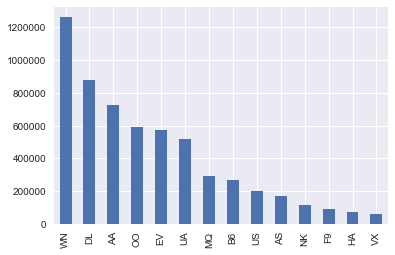

In [8]:
df['AIRLINE'].value_counts().plot(kind='bar')

# convert string to numeric variable

In [117]:
#dummy=pd.get_dummies(df[['AIRLINE','season']])
#df=pd.concat([df,dummy],axis=1)

In [175]:
df['ORIGIN_AIRPORT']=df['ORIGIN_AIRPORT'].astype('category')
df['DESTINATION_AIRPORT']=df['DESTINATION_AIRPORT'].astype('category')
df['AIRLINE']=df['AIRLINE'].astype('category')
origin=dict(enumerate(df['ORIGIN_AIRPORT'].cat.categories))
dest=dict(enumerate(df['DESTINATION_AIRPORT'].cat.categories))
airline=dict(enumerate(df['AIRLINE'].cat.categories))

In [177]:
df['ORIGIN_AIRPORT']=df['ORIGIN_AIRPORT'].cat.codes
df['DESTINATION_AIRPORT']=df['DESTINATION_AIRPORT'].cat.codes
df['AIRLINE']=df['AIRLINE'].cat.codes

In [174]:
airline

{0: 'AA',
 1: 'AS',
 2: 'B6',
 3: 'DL',
 4: 'EV',
 5: 'F9',
 6: 'HA',
 7: 'MQ',
 8: 'NK',
 9: 'OO',
 10: 'UA',
 11: 'US',
 12: 'VX',
 13: 'WN'}

In [178]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,date,day_of_week,season,sch_dep_hr,sch_arr_hr
0,2015,1,1,4,1,98,N407AS,323,584,2015-01-01 00:05:00,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,3,1,0,4
1,2015,1,1,4,0,2336,N3KUAA,482,542,2015-01-01 00:10:00,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,3,1,0,7
2,2015,1,1,4,11,840,N171US,584,373,2015-01-01 00:20:00,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,3,1,0,8
3,2015,1,1,4,0,258,N3HYAA,482,510,2015-01-01 00:20:00,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,3,1,0,8
4,2015,1,1,4,1,135,N527AS,583,324,2015-01-01 00:25:00,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,3,1,0,3


# EDA

In [181]:
df['label']=df['ARRIVAL_DELAY'].apply(lambda x: 1 if x<=0 else (2 if x<=14 else 3))
df['label'] = df['label'].astype(object)

In [11]:
flight_count=df['ORIGIN_AIRPORT'].value_counts()

In [13]:
airport=pd.read_csv("airports.csv")
airport.head()

In [3]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(11,11))
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)

KeyError: 'PROJ_LIB'

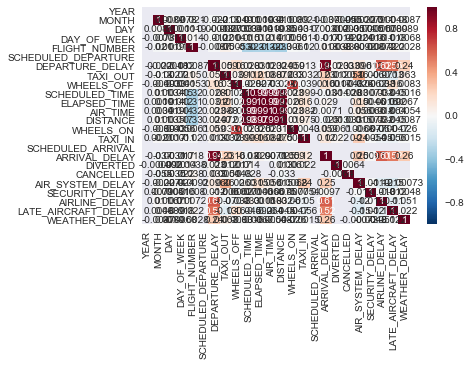

In [137]:
sns.heatmap(df.corr(),annot=True)

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


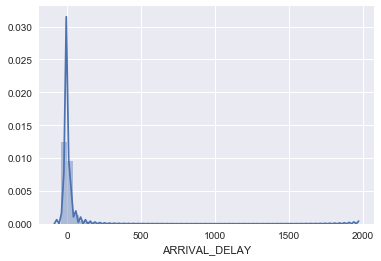

In [241]:
sns.distplot(df['ARRIVAL_DELAY'].dropna())

In [242]:
df['AIRLINE'].unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


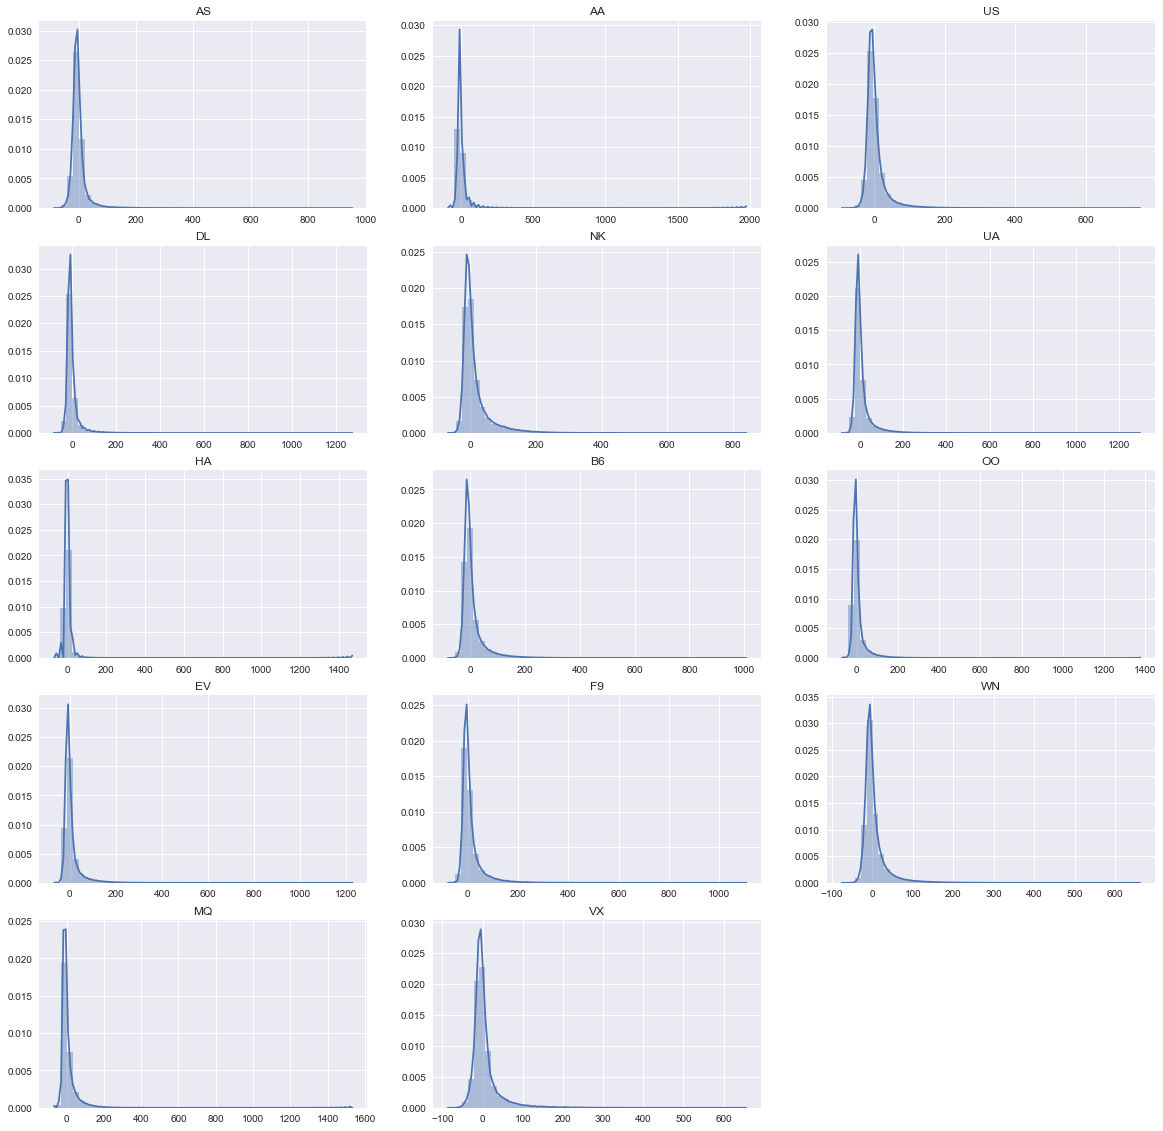

In [249]:
i=0
fig = plt.figure(1,figsize=(20,20))
for carrier in df['AIRLINE'].unique():
    i=i+1
    ax = fig.add_subplot(5,3,i) 
    sns.distplot(df[df['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    ax.xaxis.label.set_visible(False)
    plt.title(carrier)

In [164]:
np.percentile(df['ARRIVAL_DELAY'].dropna(),81)

14.0

In [210]:
f={'label':{'A0':lambda x:sum(1 for i in x if i==1)/len(x),'A14':lambda x:sum(1 for i in x if i<=2)/len(x)}}
x=df.groupby(['AIRLINE']).agg(f)

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [211]:
x=x.reset_index()
x.columns=['airline','a0','a14']

In [212]:
x=x.melt('airline',value_name='rate')
x

,airline,variable,rate
0,AA,a0,0.634648
1,AS,a0,0.663606
2,B6,a0,0.599308
3,DL,a0,0.707214
4,EV,a0,0.597113
5,F9,a0,0.537870
6,HA,a0,0.601295
7,MQ,a0,0.594932
8,NK,a0,0.496733
9,OO,a0,0.602324


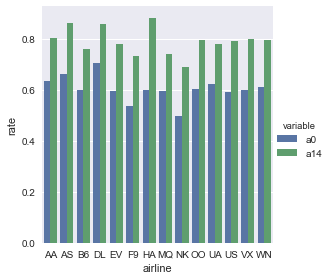

In [213]:
sns.factorplot(x='airline',y='rate',data=x,kind='bar',hue='variable')

# model

In [123]:
df=df.loc[df['CANCELLED']==0]
df=df.loc[df['DIVERTED']==0]

In [179]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'date', 'day_of_week', 'season',
       'sch_dep_hr', 'sch_arr_hr'],
      dtype='object')

In [188]:
columns_keep=['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
              'sch_dep_hr','sch_arr_hr', 'DEPARTURE_DELAY', 'TAXI_OUT', 'AIR_TIME', 'DISTANCE',
       'TAXI_IN'  ,'day_of_week', 'season', 'label']
df_new=df[columns_keep]

In [189]:
df_new.isnull().sum()

DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
sch_dep_hr                  0
sch_arr_hr                  0
DEPARTURE_DELAY         86153
TAXI_OUT                89047
AIR_TIME               105071
DISTANCE                    0
TAXI_IN                 92513
day_of_week                 0
season                      0
label                       0
dtype: int64

In [190]:
df_new=df_new.dropna(axis=0)

In [125]:
from sklearn.model_selection import train_test_split

In [192]:
train_x,test_x,train_y,test_y=train_test_split(df_new[df_new.columns[:-1]],df_new['label'],test_size=0.9)

In [193]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm_model=lm.fit(train_x,train_y)

In [198]:
pd.DataFrame({'variable':train_x.columns,
            'coef':lm.coef_ })

,coef,variable
0,-0.000228,DAY_OF_WEEK
1,0.012310,AIRLINE
2,0.000199,ORIGIN_AIRPORT
3,-0.000034,DESTINATION_AIRPORT
4,0.015206,sch_dep_hr
5,0.000414,sch_arr_hr
6,0.011221,DEPARTURE_DELAY
7,0.023330,TAXI_OUT
8,0.008432,AIR_TIME
9,-0.001031,DISTANCE


In [201]:
lm.score(train_x,train_y)  #r2

0.43032799786378495

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
train_y.head()

790898     1
666307     3
2909579    2
5715208    1
4300000    3
Name: label, dtype: object

In [203]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction3=model.predict(train_x)
metrics.accuracy_score(prediction3,train_y)

ValueError: Unknown label type: 'unknown'